In [1]:
#importer les llibrairies necessaires
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_path = "cat.jpg"
image = cv2.imread(image_path)

In [10]:

# Paramètres du bruit
mean = 0  # Moyenne du bruit
sigma = 25  # Écart-type du bruit

# Générer un bruit gaussien
noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)

# Ajouter le bruit à l'image (avec saturation pour éviter les débordements)
noisy_image = cv2.add(image, noise)

# Afficher l'image originale et bruitée
cv2.imshow("Original", image)
cv2.imshow("Noisy Image", noisy_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
#apply Frequency Domain Filters
domainFilter = cv2.edgePreservingFilter(image, flags=1, sigma_s=60, sigma_r=0.6)
cv2.imshow('Domain Filter',domainFilter)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
#apply Frequency Domain Filters
domainFilter = cv2.edgePreservingFilter(noisy_image, flags=1, sigma_s=60, sigma_r=0.6)
cv2.imshow('Domain Filter',domainFilter)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#apply Gaussian Blur 
gaussBlur = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow("Gaussian Smoothing",gaussBlur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#apply Gaussian Blur 
gaussBlur = cv2.GaussianBlur(image,(5,5),cv2.BORDER_DEFAULT)
cv2.imshow("Gaussian Smoothing",noisy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
prob=0.02
noisy_img = np.copy(image)  # Copy the original image
total_pixels = image.size  # Total number of pixels
# Number of salt & pepper pixels
num_salt = int(prob * total_pixels / 2)
num_pepper = int(prob * total_pixels / 2)
    
# Add Salt (white pixels)
coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
noisy_img[coords[0], coords[1]] = 255  # White pixels
    
# Add Pepper (black pixels)
coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
noisy_img[coords[0], coords[1]] = 0  # Black pixels

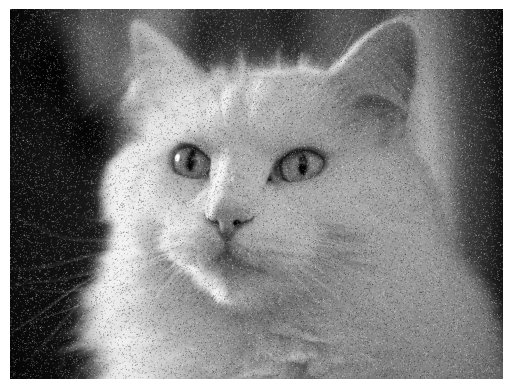

In [14]:
# Display the image using Matplotlib
plt.imshow(noisy_img, cmap="gray") 
plt.axis("off")
plt.show()

In [20]:
# Apply Median Filter (kernel size must be odd)
filtered_image = cv2.medianBlur(noisy_img, 5)

# Show results
cv2.imshow("Noisy Image", noisy_img)
cv2.imshow("Filtered Image", filtered_image)

cv2.waitKey(0)
cv2.destroyAllWindows()